In [55]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import statsmodels
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, train_test_split

In [2]:
def get_all_files(directory_path):
    # Get a list of all the files in the directory
    file_names = os.listdir(directory_path)
    file_paths = [os.path.join(directory_path, file_name) for file_name in file_names if '.labels' not in file_name]
    file_paths = [file_path for file_path in file_paths if os.path.isfile(file_path)]
    return file_paths

In [8]:
def get_all_labels(directory_path):
    # Get a list of all the files in the directory
    file_names = os.listdir(directory_path)
    file_paths = [os.path.join(directory_path, file_name) for file_name in file_names if '.labels' in file_name]
    file_paths = [file_path for file_path in file_paths if os.path.isfile(file_path)]
    return file_paths

In [9]:
feature_names = np.loadtxt('/Users/borosabel/Documents/Uni/ML&Pattern Classification/UE/ML-PatterClassification/python/feature_names.txt', dtype=str).T

# directories = ['cowpig1']
directories = ['cowpig1', 'eueowl1', 'tawowl1', 'eucdov', 'grswoo', 'comcuc']

root_dir = "/Users/borosabel/Documents/Uni/ML&Pattern Classification/UE/ML-PatterClassification/python"

labels = {'cowpig1':2, 'eueowl1':4, 'tawowl1':6, 'eucdov':3, 'grswoo':5, 'comcuc':1, 'other':0}

In [10]:
def get_all_data(directories):
# Get the current directory path

    file_paths = []
    label_file_paths = []

    for dir_ in directories:
        current_dir = root_dir + '/' + dir_
        file_paths = get_all_files(current_dir)
        label_file_paths = get_all_labels(current_dir)

        all_files_in_dir = np.empty((0, 548))
        all_labels_in_dir = np.empty((0, 1))

        for file in file_paths:
            label_file = current_dir + '/' + file.split('/')[-1][:-4] + '.labels.npy'
            data = np.load(file)
            labels = np.load(label_file)
            all_files_in_dir = np.concatenate((all_files_in_dir, data))
            all_labels_in_dir = np.concatenate((all_labels_in_dir, labels[:, :1]))

        X = pd.DataFrame(all_files_in_dir, columns = feature_names)
        y = pd.DataFrame(all_labels_in_dir, columns=["label"])
        
    return X, y

<h2>Cross validation</h2>

In [12]:
cowpig_data, cowpig_label = get_all_data(['cowpig1'])
eueowl1_data, eueowl1_label = get_all_data(['eueowl1'])
tawowl1_data, tawowl1_label = get_all_data(['tawowl1'])
eucdov_data, eucdov_label = get_all_data(['eucdov'])
grswoo_data, grswoo_label = get_all_data(['grswoo'])
comcuc_data, comcuc_label = get_all_data(['comcuc'])


all_data = np.concatenate((cowpig_data, eueowl1_data, tawowl1_data, eucdov_data, grswoo_data, comcuc_data))
all_labels = np.concatenate((cowpig_label, eueowl1_label, tawowl1_label, eucdov_label, grswoo_label, comcuc_label))

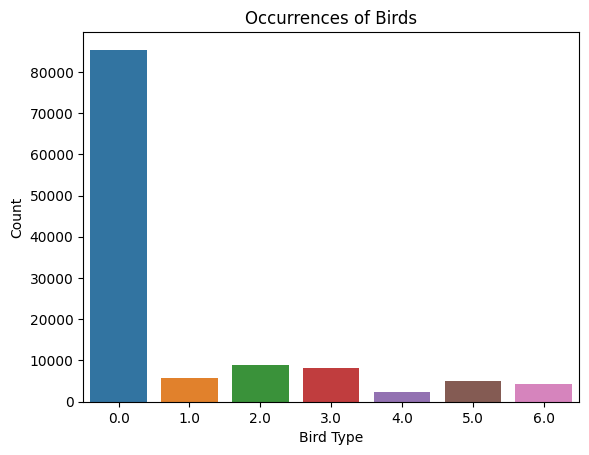

In [62]:
unique_nums, counts = np.unique(all_labels, return_counts=True)

# Plot the bar chart
sns.barplot(x=unique_nums, y=counts)

# Set the labels and title
plt.xlabel('Bird Type')
plt.ylabel('Count')
plt.title('Occurrences of Birds')

# Show the plot
plt.show()

In [34]:
features = pd.DataFrame(all_data, columns=feature_names)
target = pd.DataFrame(all_labels, columns=['label'])

In [79]:
# Define the number of folds (k)
k = 10

# Initialize the StratifiedKFold object
skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)

# Perform cross-validation
selected_features_list = []
for train_index, test_index in skf.split(features, target):
    X_train, X_test = features.iloc[train_index], features.iloc[test_index]
    y_train, y_test = target.iloc[train_index], target.iloc[test_index]

5


/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarnin

/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarnin

/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarnin

/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarnin

/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarnin

/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarnin

/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarnin

/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarnin

/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarnin

/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarnin

/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarnin

/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarnin

/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarnin

/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarnin

/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarnin

/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarnin

/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarnin

/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarnin

/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarnin

/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarnin

/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarnin

/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarnin

/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarnin

/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarnin

/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarnin

/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarnin

/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarnin

/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarnin

/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarnin

/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarnin

/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarnin

/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarnin

/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarnin

/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarnin

/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarnin

/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarnin

/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarnin

/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarnin

/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarnin

/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarnin

/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarnin

/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarnin

/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarnin

/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarnin

/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarnin

/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarnin

/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarnin

/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarnin

/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarnin

/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarnin

/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarnin

/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarnin

/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarnin

/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarnin

/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarnin

/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarnin

/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarnin

/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarnin

/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarnin

/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarnin

/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarnin

/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarnin

/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarnin

/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarnin

/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarnin

/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarnin

/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarnin

/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarnin

/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarnin

/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarnin

/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarnin

/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarnin

/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarnin

/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarnin

/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarnin

/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarnin

/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarnin

/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarnin

/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarnin

/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarnin

/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarnin

/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarnin

/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarnin

/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarnin

/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarnin

/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarnin

/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarnin

/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarnin

/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarnin

/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarnin

/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarnin

/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


['cln_contrast_mean_3', 'yin_6', 'raw_energy_std', 'raw_flux_mean', 'raw_contrast_mean_2']
5


/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarnin

/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarnin

/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarnin

/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarnin

/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarnin

/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarnin

/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarnin

/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarnin

/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarnin

/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarnin

/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarnin

/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarnin

/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarnin

/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarnin

/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarnin

/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarnin

/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarnin

/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarnin

/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarnin

/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarnin

/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarnin

/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarnin

/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarnin

/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarnin

/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarnin

/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarnin

/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarnin

/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarnin

/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarnin

/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarnin

/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarnin

/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarnin

/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarnin

/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarnin

/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarnin

/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarnin

/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarnin

/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarnin

/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarnin

/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarnin

/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarnin

/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarnin

/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarnin

/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarnin

/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarnin

/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarnin

/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarnin

/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarnin

/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarnin

/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarnin

/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarnin

/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarnin

/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarnin

/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarnin

/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarnin

/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarnin

/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarnin

/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarnin

/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarnin

/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarnin

/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarnin

/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarnin

/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarnin

/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarnin

/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarnin

/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarnin

/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarnin

/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarnin

/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarnin

/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarnin

/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarnin

/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarnin

/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarnin

/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarnin

/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarnin

/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarnin

/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarnin

/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarnin

/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarnin

/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarnin

/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarnin

/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarnin

/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarnin

/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarnin

/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarnin

/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarnin

/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarnin

/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarnin

/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarnin

/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarnin

/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarnin

['cln_contrast_mean_3', 'yin_5', 'cln_mfcc_mean_0', 'raw_melspect_mean_4', 'raw_melspect_mean_13']
5


/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarnin

/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarnin

/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarnin

/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarnin

/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarnin

/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarnin

/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarnin

/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarnin

/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarnin

/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarnin

/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarnin

/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarnin

/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarnin

/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarnin

/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarnin

/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarnin

/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarnin

/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarnin

/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarnin

/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarnin

/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarnin

/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarnin

/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarnin

/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarnin

/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarnin

/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarnin

/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarnin

/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarnin

/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarnin

/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarnin

/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarnin

/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarnin

/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarnin

/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarnin

/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarnin

/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarnin

/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarnin

/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarnin

/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarnin

/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarnin

/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarnin

/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarnin

/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarnin

/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarnin

/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarnin

/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarnin

/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarnin

/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarnin

/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarnin

/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarnin

/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarnin

/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarnin

/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarnin

/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarnin

/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarnin

/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarnin

/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarnin

/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarnin

/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarnin

/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarnin

/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarnin

/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarnin

/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarnin

/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarnin

/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarnin

/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarnin

/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarnin

/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarnin

/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarnin

/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarnin

/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarnin

/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarnin

/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarnin

/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarnin

/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarnin

/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarnin

KeyboardInterrupt: 

In [72]:
selected_features

['zcr_std', 'zcr_mean']

<h2>Correlation between features</h2>

In [35]:
correlation_matrix = features.corr().abs()

In [36]:
upper = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

In [38]:
upper.shape

(548, 548)

In [39]:
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

In [40]:
features.drop(to_drop, axis=1, inplace=True)

In [41]:
features

,zcr_mean,zcr_std,yin_0,yin_1,yin_2,yin_3,yin_4,yin_5,yin_6,yin_7,...,cln_contrast_mean_4,cln_contrast_mean_5,cln_contrast_mean_6,cln_contrast_std_0,cln_contrast_std_1,cln_contrast_std_2,cln_contrast_std_3,cln_contrast_std_4,cln_contrast_std_5,cln_contrast_std_6
0,0.104213,0.025389,144.178635,167.021698,115.430466,115.579773,124.897186,124.318657,134.522064,138.791565,...,12.657701,14.509855,18.643116,2.905979,2.252764,2.997747,3.173423,2.699984,2.714874,2.329038
1,0.108329,0.018797,116.932335,116.810623,104.958511,106.856224,107.122963,131.222122,353.585815,128.099060,...,13.057364,13.359251,16.425354,2.510432,2.361842,2.691745,1.427239,2.369561,1.818932,2.163963
2,0.203055,0.022426,319.182281,131.998932,131.480270,121.196114,121.224365,121.071152,131.966660,794.266663,...,12.970959,21.755045,21.717041,1.537123,1.638237,3.026752,1.810459,2.805019,4.571950,4.293758
3,0.119210,0.032156,256.728058,515.784363,224.581177,112.526237,131.550888,131.923523,129.934570,115.061554,...,14.145430,15.075860,19.178572,2.318594,2.508579,1.901502,3.409710,2.446294,1.661939,3.035185
4,0.113839,0.019690,116.983658,108.427589,108.570358,136.068344,135.782394,111.091484,111.612175,104.272835,...,12.054803,14.731396,17.400953,3.947008,1.956441,2.477308,3.416498,1.927335,1.812950,1.570067
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119995,0.073382,0.043350,858.709106,859.935059,863.328430,4302.474121,4084.642578,3813.006836,3866.472412,4184.843750,...,17.373228,16.825651,22.475708,2.356882,2.618949,2.250412,2.331108,4.017359,2.289333,2.304441
119996,0.026786,0.021679,3544.072021,3636.010010,3683.929199,3720.447510,3778.039062,3810.043457,3821.472656,3775.821533,...,13.843332,15.092970,19.419765,1.739386,1.899920,2.972288,3.275728,3.504961,1.926326,1.559724
119997,0.000837,0.003018,3488.506104,3421.704102,3381.033447,3309.861572,3363.148926,3329.871582,3270.464844,3205.298096,...,13.192764,14.612162,16.889723,2.074640,3.095009,2.575306,3.005124,2.567822,2.403719,0.977590
119998,0.000000,0.000000,2856.960938,2819.917480,2707.269775,5311.467773,2821.321533,2906.507568,2896.592285,2886.045166,...,13.242117,16.405230,17.726557,3.940534,3.248955,4.130877,1.688196,3.651503,3.851557,1.590729


In [42]:
features.shape

(120000, 345)

<h2>PCA</h2>

In [46]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [44]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

In [47]:
pca = PCA()
X_pca = pca.fit_transform(X_scaled)
# Should I split the data into train and test set here?

In [48]:
exp_var_pca = pca.explained_variance_ratio_

In [49]:
cum_sum_eigenvalues = np.cumsum(exp_var_pca)

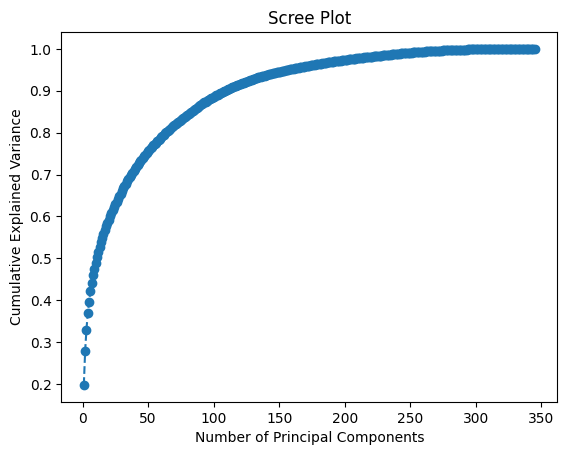

In [53]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(exp_var_pca) + 1), cum_sum_eigenvalues, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot')
plt.show()

In [56]:
# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(features, target, test_size=0.2, random_state=42)

# Define the range of k values to explore
k_values = np.arange(1, 16, 2)  # Odd integers from 1 to 15

# Define the KNN model
knn = KNeighborsClassifier()

# Perform grid search with cross-validation
param_grid = {'n_neighbors': k_values}
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Retrieve the best k value
best_k = grid_search.best_params_['n_neighbors']
print("Best k value:", best_k)

# Evaluate the model with the best k value
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
print("Validation accuracy with best k:", accuracy)

/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarnin

/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/borosabel/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarnin

Best k value: 9
Validation accuracy with best k: 0.7744583333333334
